<a href="https://colab.research.google.com/github/joony0512/Linear_Programming/blob/main/LinearProgramming_%EC%9A%B4%EB%B0%98%EB%B9%84%EC%9A%A9%EC%B5%9C%EC%86%8C%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 104.7 MB/s eta 0:00:00


# linear programming 목적: 의사결정에 도움되는 것
## 1.변수정하기
## 2.목적함수정하기
## 3.제약식 정하기

3. A 마트는 전국에서 생산된 쌀을 김제, 영주 등 4곳의 저장소에 모아 도정한후,  
서울, 대전 등 전국 5개 물류센터로 운반한다.  
각 저장소의 최대 공급가능용량과 물류센터별 쌀 수요는 다음과 같다.  
운반비용을 최소화하는 운송계획을 수립하라.
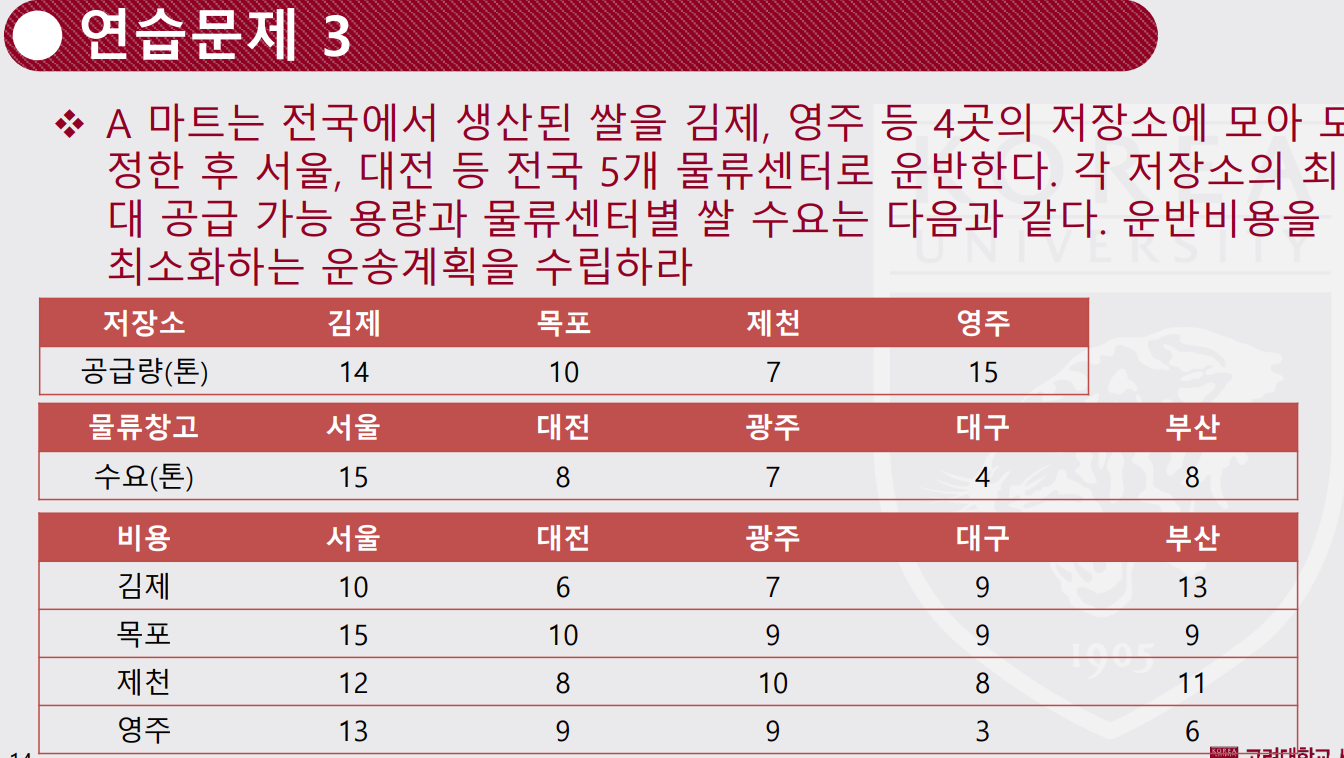

In [ ]:
from pulp import *

model = LpProblem(name="LogisticsProblem", sense=LpMinimize)

# Define variables
num_row=4
num_col=5
variables = [LpVariable(name=f"x{i}{j}", lowBound=0) for i in range(1, num_row+1) for j in range(1, num_col+1)]

# Define constraints
constraints = []
for i in range(num_row):
    rhs_values = [14, 10, 7, 15]
    constr_sup = LpConstraint(
        e=LpAffineExpression([(variables[num_col*i+j], 1) for j in range(num_col)]),
        sense=LpConstraintLE,
        rhs=rhs_values[i],
        name=f"constraint_sup{i + 1}"
    )
    constraints.append(constr_sup)

for i in range(num_row+1):
    rhs_values = [15, 8, 7, 4, 8]
    #x11 + x21 + x31 + x41 >= 15
    constr_inf = LpConstraint(
        e=LpAffineExpression([(variables[i+num_col*j], 1) for j in range(num_row)]),
        sense=LpConstraintGE,
        rhs=rhs_values[i],
        name=f"constraint_dem{i + 1}"
    )
    constraints.append(constr_inf)

# Define objective function
obj_coefficients = [[10, 6, 7, 9, 13],[15, 10, 9, 9, 9],[12, 8, 10, 8, 11],[13, 9, 9, 3, 6]]
obj = LpAffineExpression([(variables[i*num_col+j],  obj_coefficients[i][j]) for i in range(num_row) for j in range(num_col)])
model += obj

# Add variables, constraints, and objective function to the model
for constraint in constraints:
    model += constraint

# Print the LP model
print(model)
model.writeLP('out.txt')

# Solve the model
model.solve()

# Print the solution
for variable in variables:
    print(f"{variable.name}: {variable.value()}")

print(f"Optimal objective value: {model.objective.value()}")

LogisticsProblem:
MINIMIZE
10*x11 + 6*x12 + 7*x13 + 9*x14 + 13*x15 + 15*x21 + 10*x22 + 9*x23 + 9*x24 + 9*x25 + 12*x31 + 8*x32 + 10*x33 + 8*x34 + 11*x35 + 13*x41 + 9*x42 + 9*x43 + 3*x44 + 6*x45 + 0
SUBJECT TO
constraint_sup1: x11 + x12 + x13 + x14 + x15 <= 14

constraint_sup2: x21 + x22 + x23 + x24 + x25 <= 10

constraint_sup3: x31 + x32 + x33 + x34 + x35 <= 7

constraint_sup4: x41 + x42 + x43 + x44 + x45 <= 15

constraint_dem1: x11 + x21 + x31 + x41 >= 15

constraint_dem2: x12 + x22 + x32 + x42 >= 8

constraint_dem3: x13 + x23 + x33 + x43 >= 7

constraint_dem4: x14 + x24 + x34 + x44 >= 4

constraint_dem5: x15 + x25 + x35 + x45 >= 8

VARIABLES
x11 Continuous
x12 Continuous
x13 Continuous
x14 Continuous
x15 Continuous
x21 Continuous
x22 Continuous
x23 Continuous
x24 Continuous
x25 Continuous
x31 Continuous
x32 Continuous
x33 Continuous
x34 Continuous
x35 Continuous
x41 Continuous
x42 Continuous
x43 Continuous
x44 Continuous
x45 Continuous

x11: 14.0
x12: 0.0
x13: 0.0
x14: 0.0
x15: 0.0
x2